In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# import custom modules
from custom_libs import db
from custom_libs import preprocessing
from custom_libs import classification
from custom_libs import plotting

## Loading del dataset e Preprocessing

In [2]:
df = db.get_dataset("McDonald_s_Reviews")
preprocessing.add_id_column(df, columns=["latitude", "longitude"])
df.head(2)

Number of unique ids:  39


,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,id
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,9.0
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,9.0


Qui prima dovremmo fare prima un il preprocessing
idee per un possibile preprocessing da aggiungere alla funzione che esiste già:
- eliminare parole come "mcdonalds", "order" (dopo cheè stato fatto il lower case)

In [3]:
#proprocessing_function = preprocessing.preprocess_text1
#preprocessing.preprocess_dataframe(X, 'review', proprocessing_function)

## Sezione inerente alle Classificazioni

In [4]:
classification.append_sentiment_for_each_row(df, 'review', new_column_name='sentiment')
df[['review', 'sentiment']]

,review,sentiment
0,Why does it look like someone spit on my food?...,Positive
1,It'd McDonalds. It is what it is as far as the...,Positive
2,Made a mobile order got to the speaker and che...,Negative
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,Neutral
4,"I repeat my order 3 times in the drive thru, a...",Negative
...,...,...
33391,They treated me very badly.,Negative
33392,The service is very good,Positive
33393,To remove hunger is enough,Negative
33394,"It's good, but lately it has become very expen...",Positive


In [5]:
def plot_sentiment_word_clouds(df):
    for sentiment in classification.Sentiment.get_all():
        X_sentiment = df[(df['sentiment']==sentiment)]
        plotting.plot_word_cloud(X_sentiment, sentiment)

# plot_sentiment_word_clouds(df)

In [6]:
X, y= df['review'], df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Ci sarebbe da sperimentare con i parametri di questo come nel esempio medico (bigrammi, tringrammi, ecc)
# C'è anche una funzione molto carina che si può usare che si chiama "most_informative_feature_for_class"
# Ci sarebbe da provare anche il Count Vectorizer (servirà sicuramente per la presentazione)
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

Accuracy: 0.8868263473053892
Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.88      0.84      1937
     Neutral       0.88      0.82      0.85      1244
    Positive       0.93      0.91      0.92      3499

    accuracy                           0.89      6680
   macro avg       0.88      0.87      0.87      6680
weighted avg       0.89      0.89      0.89      6680

Confusion matrix, without normalization


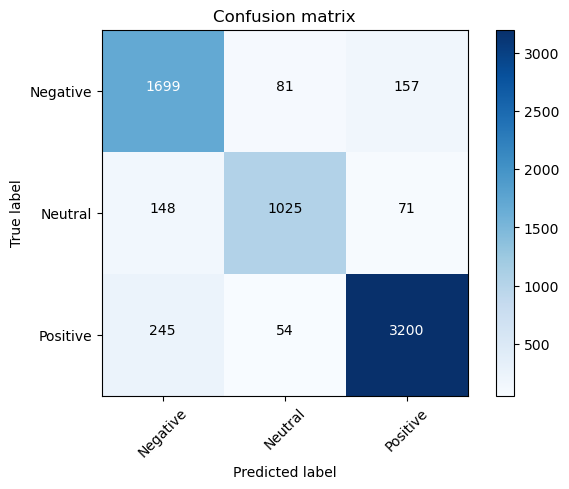

In [8]:
class_names = classification.Sentiment.get_all()
model = classification.test_classifier(SVC, x_train_tfidf, x_test_tfidf, y_train, y_test, class_names)

Abbiamo altri 2 classificatori da testare, tutti in combinazione con diverse configurazioni del TF-IDF e del CountVectorizer.

In [9]:
reviews = [
    "This restaurant has excellent service and delicious food.",
    "This restaurant sucks.", "This is fine",
    "This is dull",
    "its bad"
]

# Questo None non ci va bene
# Ci serve per adesso perche in fase di induzione non faciamo nessum preprocessing
# Come lo faremo aggiungeremo questa funzione anche qui
classification.predict_sentences(reviews, vectorizer, model, preprocess_function=None)

,test_sent,prediction
0,This restaurant has excellent service and deli...,Positive
1,This restaurant sucks.,Negative
2,This is fine,Positive
3,This is dull,Neutral
4,its bad,Negative
